# Data Visualization

## Large Car Dataset 

### Prediction of Car Sales by Model

#### Initialization and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

data = pd.read_csv("car_data.csv")
data.head()

C:\Users\cpani\AppData\Local\Temp\ipykernel_20296\4080463895.py:8: DtypeWarning: Columns (1,8,9,17,18,22,25,26,32,37,45,53,65,67,69,79,91,93,107,111,113,120,122,133,144) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("car_data.csv")


,vin,stockNum,firstSeen,lastSeen,msrp,askPrice,mileage,isNew,color,interiorColor,...,vf_VIN,vf_ValveTrainDesign,vf_VehicleType,vf_WheelBaseLong,vf_WheelBaseShort,vf_WheelBaseType,vf_WheelSizeFront,vf_WheelSizeRear,vf_Wheels,vf_Windows
0,abc5f0360059cf7b6fa8368db57f220ab0d87d582bf6ce...,11701A,2019-05-06,2019-05-06,1498,1498,0,False,Gray,NaN,...,abc5f0360059cf7b6fa8368db57f220ab0d87d582bf6ce...,NaN,PASSENGER CAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e24402cc77f6fd2d6a9dd626ad92795b717814340f1ab1...,9055B,2019-05-06,2019-05-06,10589,10589,0,False,Super Black,NaN,...,e24402cc77f6fd2d6a9dd626ad92795b717814340f1ab1...,NaN,PASSENGER CAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1c5a8dc966b3d3b379e10477d9ff8a8aa13edf43acc7f7...,11816A,2017-06-03,2019-05-07,11992,9940,0,False,White,NaN,...,1c5a8dc966b3d3b379e10477d9ff8a8aa13edf43acc7f7...,NaN,MULTIPURPOSE PASSENGER VEHICLE (MPV),NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,edce23814c88f5a1d1af700c27ad7f4c9d705aa9873317...,11847,2019-05-06,2019-05-07,12387,12387,0,False,Silver Ice Metallic,NaN,...,edce23814c88f5a1d1af700c27ad7f4c9d705aa9873317...,Dual Overhead Cam (DOHC),PASSENGER CAR,NaN,106.3,NaN,17.0,17.0,4.0,4.0
4,6b4f8c610d14d864f024adb26cd4f0eddcff3fa18c16e3...,9097,2019-05-06,2019-05-07,41659,41659,0,True,Black Metallic,NaN,...,6b4f8c610d14d864f024adb26cd4f0eddcff3fa18c16e3...,NaN,TRUCK,156.8,145.0,NaN,17.0,17.0,4.0,NaN


In [7]:
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=100):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#### Understanding the Dataset

In [2]:
# Check for empty fields

data.isnull().sum()

vin                        0
stockNum             1950697
firstSeen                  0
lastSeen                   0
msrp                       0
                      ...   
vf_WheelBaseType     5515108
vf_WheelSizeFront    3964805
vf_WheelSizeRear     3965238
vf_Wheels            3506892
vf_Windows           5357885
Length: 156, dtype: int64

In [3]:
data.columns.values.tolist()

['vin',
 'stockNum',
 'firstSeen',
 'lastSeen',
 'msrp',
 'askPrice',
 'mileage',
 'isNew',
 'color',
 'interiorColor',
 'brandName',
 'modelName',
 'dealerID',
 'vf_ABS',
 'vf_ActiveSafetySysNote',
 'vf_AdaptiveCruiseControl',
 'vf_AdaptiveDrivingBeam',
 'vf_AdaptiveHeadlights',
 'vf_AdditionalErrorText',
 'vf_AirBagLocCurtain',
 'vf_AirBagLocFront',
 'vf_AirBagLocKnee',
 'vf_AirBagLocSeatCushion',
 'vf_AirBagLocSide',
 'vf_AutoReverseSystem',
 'vf_AutomaticPedestrianAlertingSound',
 'vf_AxleConfiguration',
 'vf_Axles',
 'vf_BasePrice',
 'vf_BatteryA',
 'vf_BatteryA_to',
 'vf_BatteryCells',
 'vf_BatteryInfo',
 'vf_BatteryKWh',
 'vf_BatteryKWh_to',
 'vf_BatteryModules',
 'vf_BatteryPacks',
 'vf_BatteryType',
 'vf_BatteryV',
 'vf_BatteryV_to',
 'vf_BedLengthIN',
 'vf_BedType',
 'vf_BlindSpotMon',
 'vf_BodyCabType',
 'vf_BodyClass',
 'vf_BrakeSystemDesc',
 'vf_BrakeSystemType',
 'vf_BusFloorConfigType',
 'vf_BusLength',
 'vf_BusType',
 'vf_CAN_AACN',
 'vf_CIB',
 'vf_CashForClunkers',
 'v

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5695015 entries, 0 to 5695014
Columns: 156 entries, vin to vf_Windows
dtypes: bool(1), float64(52), int64(4), object(99)
memory usage: 6.6+ GB


In [5]:
print(data.describe())

               msrp      askPrice       mileage      dealerID      vf_Axles  \
count  5.695015e+06  5.695015e+06  5.695015e+06  5.695015e+06  2.099577e+06   
mean   7.445697e+05  1.869206e+05  2.241465e+04  1.928301e+04  2.000007e+00   
std    3.926443e+07  1.876752e+07  9.010528e+05  1.145883e+04  7.622790e-03   
min    0.000000e+00  0.000000e+00  0.000000e+00  1.900000e+02  1.000000e+00   
25%    1.139600e+04  1.077700e+04  0.000000e+00  8.895000e+03  2.000000e+00   
50%    2.255800e+04  2.056600e+04  0.000000e+00  1.993600e+04  2.000000e+00   
75%    3.399500e+04  3.194500e+04  2.616100e+04  2.982400e+04  2.000000e+00   
max    2.147484e+09  2.147484e+09  2.147484e+09  3.997900e+04  8.000000e+00   

       vf_BasePrice  vf_BatteryA  vf_BatteryA_to  vf_BatteryCells  \
count  1.856743e+06          2.0             0.0              2.0   
mean   3.386157e+04        180.0             NaN             34.0   
std    1.452567e+04          0.0             NaN              0.0   
min    1.390

Saving figure attribute_histogram_plots


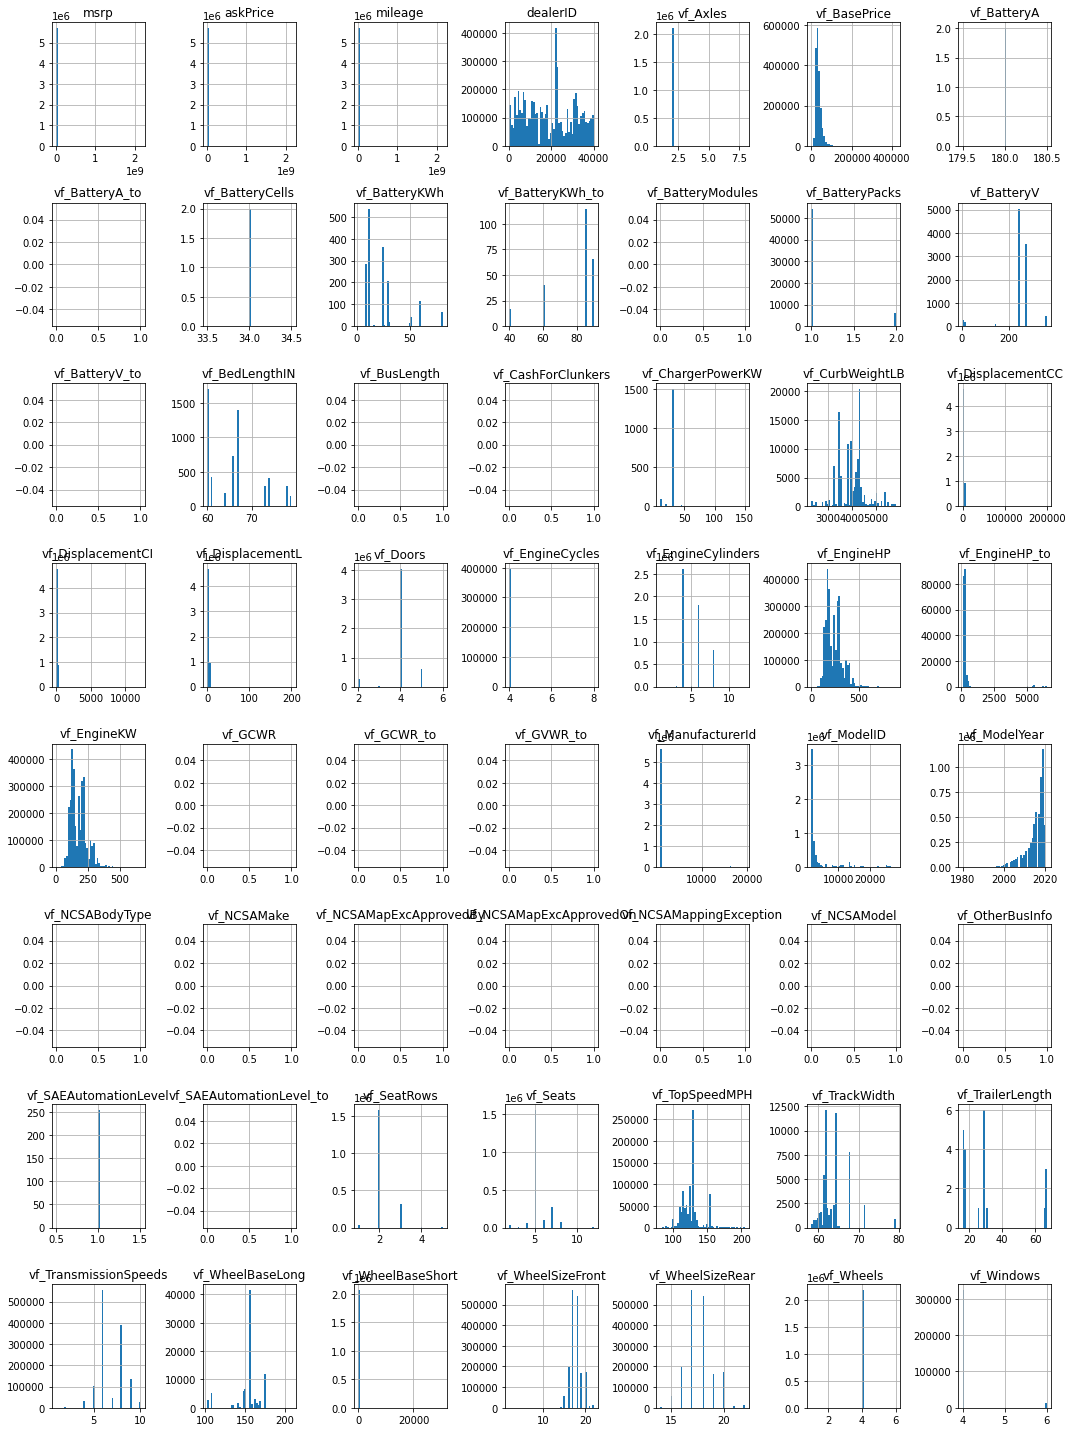

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(15,20))
save_fig("attribute_histogram_plots")
plt.show()

Saving figure Correlation plot of the data


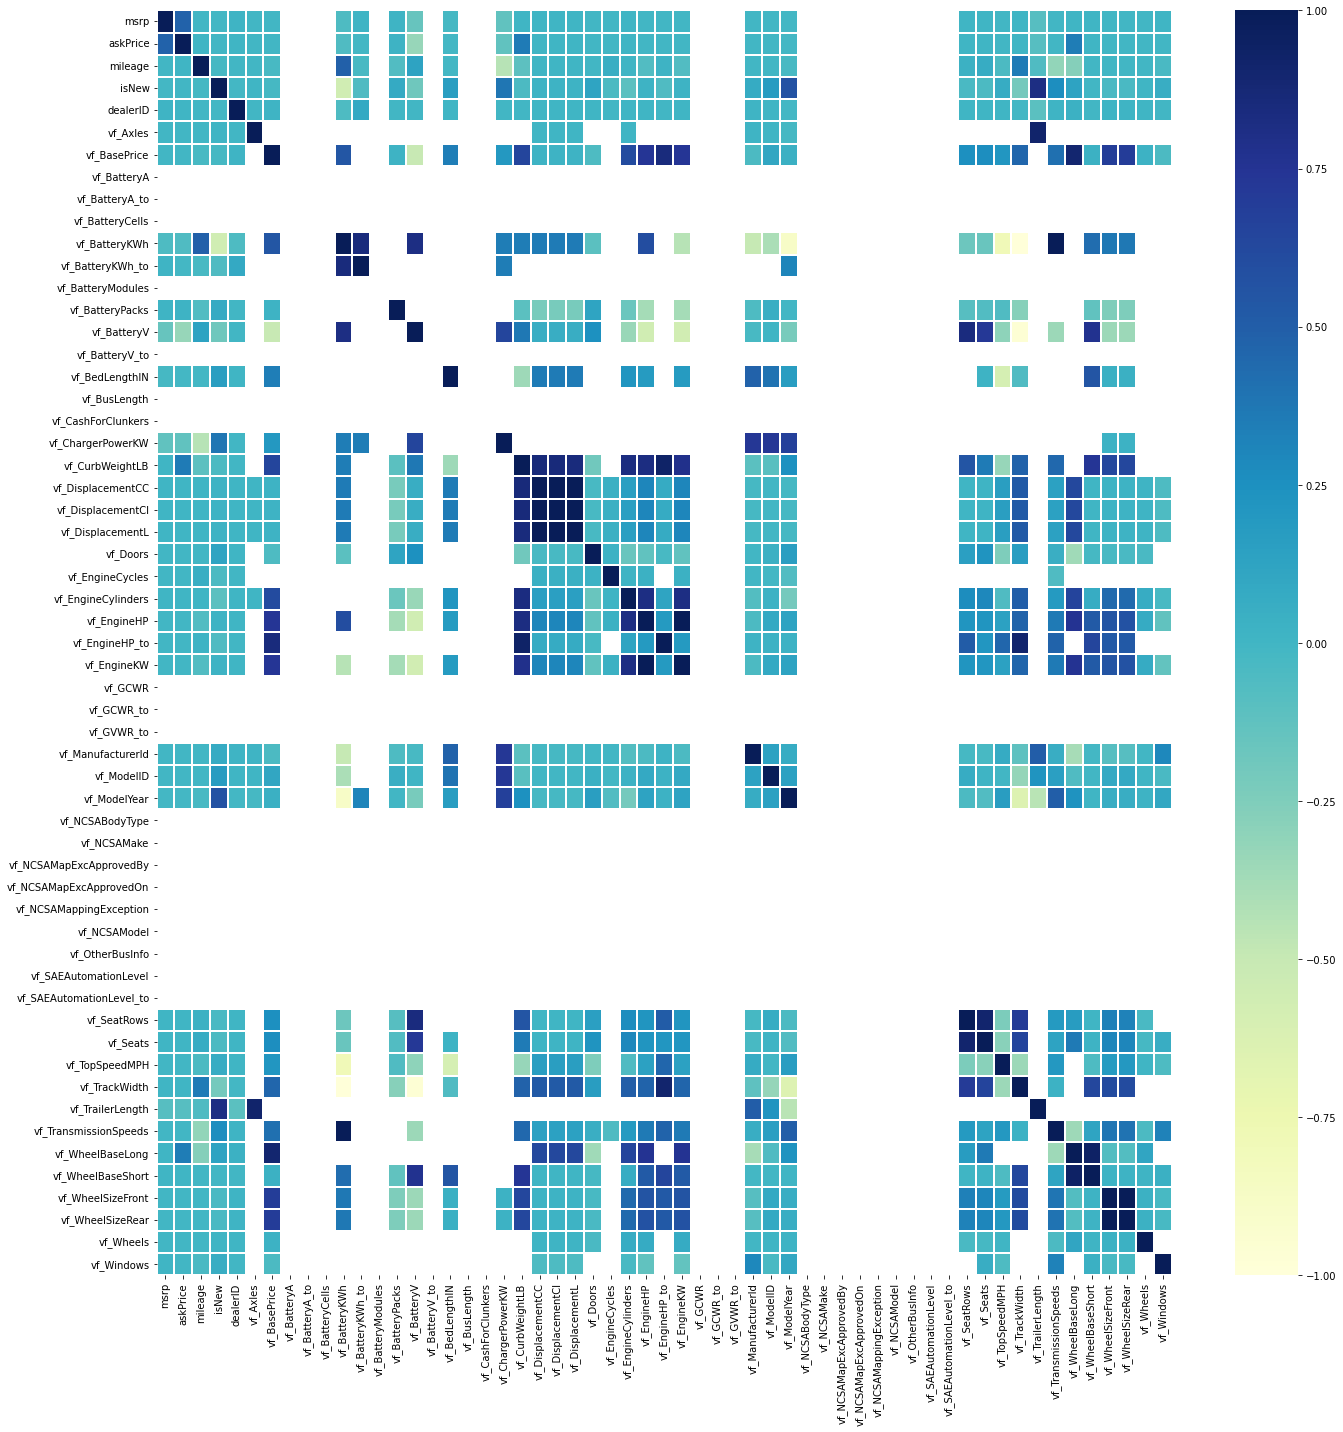

In [9]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize =(20,20)) 

corr_matrix = data.corr()
sns.heatmap(corr_matrix,ax = ax,cmap ="YlGnBu", linewidths = 0.1)

save_fig('Correlation plot of the data')
plt.show()

##### Filtering Required Fields in Dataset

In [10]:
predict = "askPrice"
dataFiltered = data[["askPrice", 'mileage', 'isNew', 'color', 'interiorColor',
            'brandName', 'vf_ABS', 'vf_AdaptiveCruiseControl', 'vf_AirBagLocFront',
            'vf_AirBagLocSide', 'vf_BodyClass', 'vf_DriveType', 'vf_EngineCylinders',
            'vf_EngineHP', 'vf_FuelTypePrimary', 'vf_Make', 'vf_Seats', 'vf_TopSpeedMPH',
            'vf_TractionControl', 'vf_TransmissionSpeeds', 'vf_TransmissionStyle']]

In [11]:
dataFiltered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5695015 entries, 0 to 5695014
Data columns (total 21 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   askPrice                  int64  
 1   mileage                   int64  
 2   isNew                     bool   
 3   color                     object 
 4   interiorColor             object 
 5   brandName                 object 
 6   vf_ABS                    object 
 7   vf_AdaptiveCruiseControl  object 
 8   vf_AirBagLocFront         object 
 9   vf_AirBagLocSide          object 
 10  vf_BodyClass              object 
 11  vf_DriveType              object 
 12  vf_EngineCylinders        float64
 13  vf_EngineHP               float64
 14  vf_FuelTypePrimary        object 
 15  vf_Make                   object 
 16  vf_Seats                  float64
 17  vf_TopSpeedMPH            float64
 18  vf_TractionControl        object 
 19  vf_TransmissionSpeeds     float64
 20  vf_TransmissionStyle    

In [12]:
dataFiltered.head()

,askPrice,mileage,isNew,color,interiorColor,brandName,vf_ABS,vf_AdaptiveCruiseControl,vf_AirBagLocFront,vf_AirBagLocSide,...,vf_DriveType,vf_EngineCylinders,vf_EngineHP,vf_FuelTypePrimary,vf_Make,vf_Seats,vf_TopSpeedMPH,vf_TractionControl,vf_TransmissionSpeeds,vf_TransmissionStyle
0,1498,0,False,Gray,NaN,MITSUBISHI,NaN,NaN,1st Row (Driver & Passenger),NaN,...,NaN,NaN,NaN,NaN,MITSUBISHI,NaN,NaN,NaN,NaN,NaN
1,10589,0,False,Super Black,NaN,NISSAN,NaN,NaN,1st Row (Driver & Passenger),1st Row (Driver & Passenger),...,4x2,4.0,NaN,Gasoline,NISSAN,NaN,NaN,NaN,NaN,NaN
2,9940,0,False,White,NaN,FORD,NaN,NaN,1st Row (Driver & Passenger),1st & 2nd Rows,...,4x2,4.0,178.0,Gasoline,FORD,NaN,NaN,NaN,NaN,NaN
3,12387,0,False,Silver Ice Metallic,NaN,CHEVROLET,Standard,NaN,1st Row (Driver & Passenger),1st & 2nd Rows,...,NaN,4.0,NaN,Gasoline,CHEVROLET,5.0,130.0,Standard,NaN,Automatic
4,41659,0,True,Black Metallic,NaN,FORD,Standard,NaN,1st Row (Driver & Passenger),1st & 2nd Rows,...,4WD/4-Wheel Drive/4x4,8.0,395.0,Gasoline,FORD,6.0,NaN,Standard,NaN,Automatic


Saving figure filtered_attribute_histogram_plots


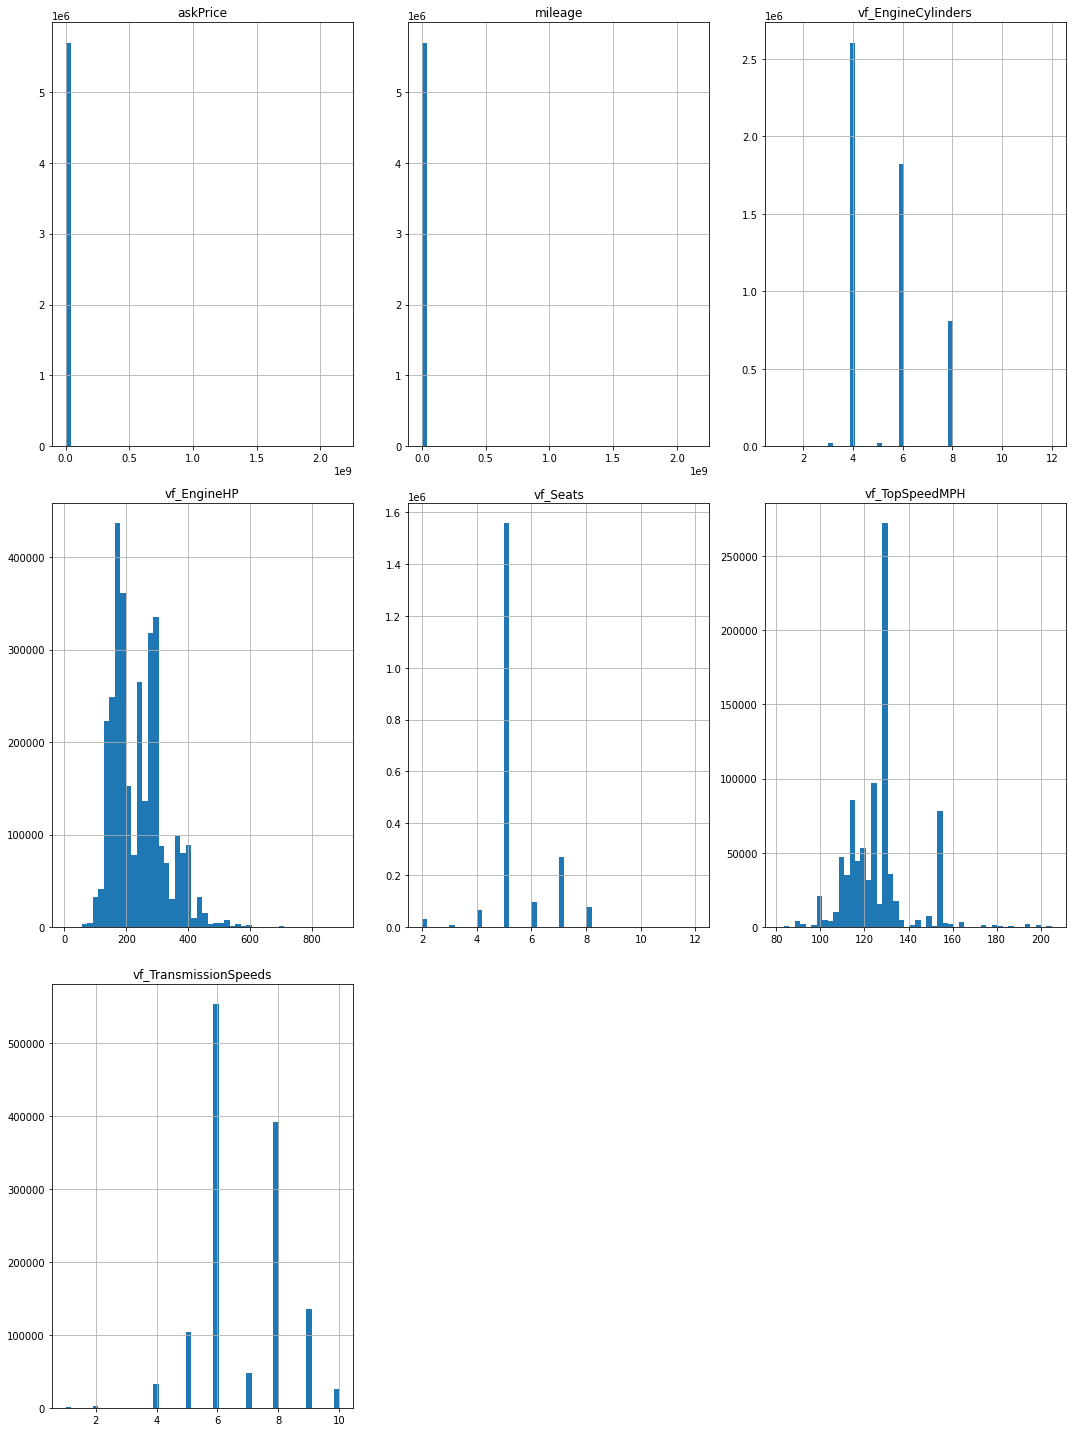

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

dataFiltered.hist(bins=50, figsize=(15,20))
save_fig("filtered_attribute_histogram_plots")
plt.show()

Saving figure Correlation plot of the filtered data


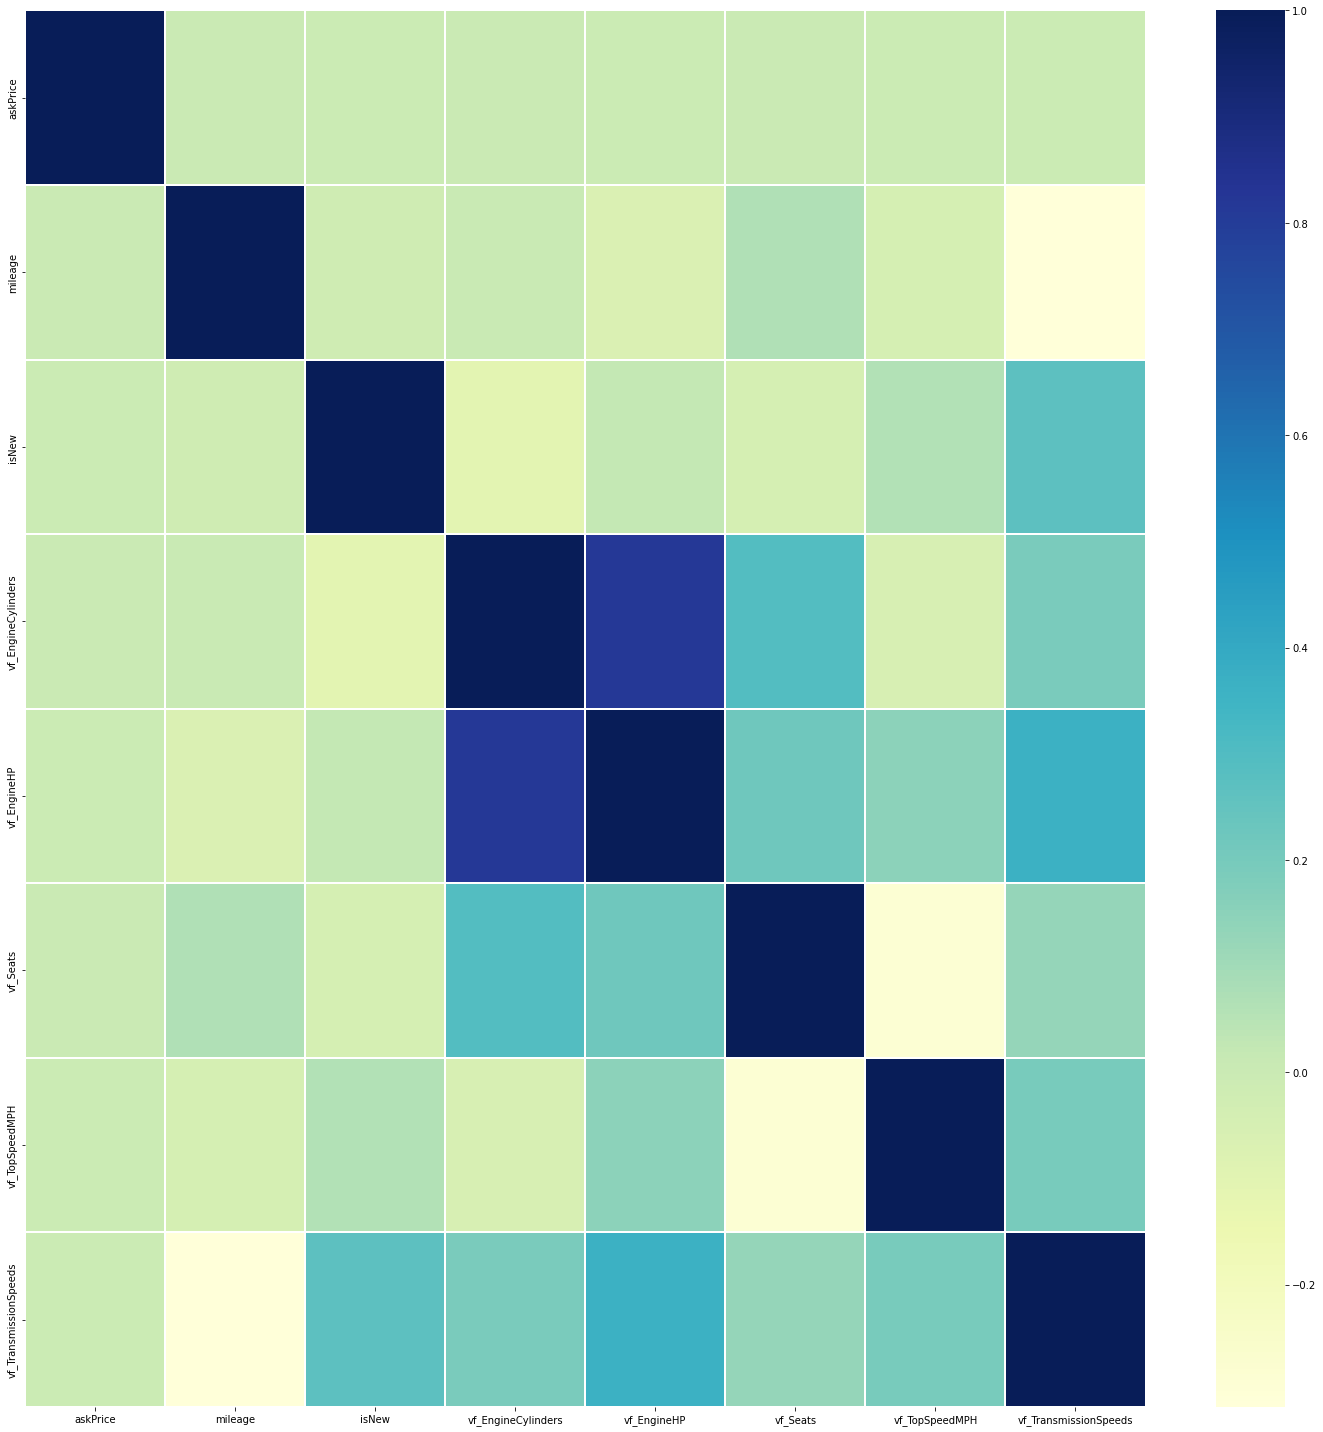

In [14]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize =(20,20)) 

corr_matrix = dataFiltered.corr()
sns.heatmap(corr_matrix,ax = ax,cmap ="YlGnBu", linewidths = 0.1)

save_fig('Correlation plot of the filtered data')
plt.show()

In [15]:
dataFiltered.isnull().sum()

askPrice                          0
mileage                           0
isNew                             0
color                       2103495
interiorColor               2742024
brandName                      1260
vf_ABS                      3364367
vf_AdaptiveCruiseControl    4732470
vf_AirBagLocFront            302911
vf_AirBagLocSide             612020
vf_BodyClass                  11559
vf_DriveType                1411574
vf_EngineCylinders           416098
vf_EngineHP                 2517224
vf_FuelTypePrimary           166433
vf_Make                        1260
vf_Seats                    3590951
vf_TopSpeedMPH              4797588
vf_TractionControl          3600224
vf_TransmissionSpeeds       4401493
vf_TransmissionStyle        3770877
dtype: int64

In [16]:
colorDf = pd.DataFrame(dataFiltered.color.value_counts()).reset_index().rename({'index': 'color', 'color': 'freq'}, axis=1) 
colorDf['ratio']  = (colorDf['freq']/len(dataFiltered))
colorDf.head(10)

,color,freq,ratio
0,Black,209449,0.036778
1,White,111259,0.019536
2,Gray,78843,0.013844
3,Summit White,72477,0.012726
4,Silver,69416,0.012189
5,Blue,61142,0.010736
6,Red,57613,0.010116
7,Oxford White,47529,0.008346
8,Shadow Black,39696,0.006970
9,Bright White Clearcoat,36033,0.006327


In [32]:
dataFiltered.to_csv('dataFiltered.csv', encoding='utf-8')

#### NaN Removal and Replace

In [29]:
valuesToReplace = {'color': 'null', 'interiorColor': 'null', 
                   'brandName': 'null', 'vf_ABS': 'null', 'vf_AdaptiveCruiseControl': 'null',
                   'vf_AirBagLocFront': 'null', 'vf_AirBagLocSide': 'null', 
                   'vf_BodyClass': 'null', 'vf_DriveType': 'null', 
                   'vf_EngineCylinders': 0, 'vf_EngineHP': 0, 
                   'vf_FuelTypePrimary': 'null', 'vf_Make': 'null', 
                   'vf_Seats': 0, 'vf_TopSpeedMPH': 0, 'vf_TractionControl': 'null',
                   'vf_TransmissionSpeeds': 0, 'vf_TransmissionStyle': 'null',
                  }
dataCleaned = dataFiltered.fillna(value=valuesToReplace)

In [30]:
dataCleaned.isnull().sum()

askPrice                    0
mileage                     0
isNew                       0
color                       0
interiorColor               0
brandName                   0
vf_ABS                      0
vf_AdaptiveCruiseControl    0
vf_AirBagLocFront           0
vf_AirBagLocSide            0
vf_BodyClass                0
vf_DriveType                0
vf_EngineCylinders          0
vf_EngineHP                 0
vf_FuelTypePrimary          0
vf_Make                     0
vf_Seats                    0
vf_TopSpeedMPH              0
vf_TractionControl          0
vf_TransmissionSpeeds       0
vf_TransmissionStyle        0
dtype: int64

In [33]:
dataCleaned.to_csv('dataCleaned.csv', encoding='utf-8')

#### Data Tokenization and Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

In [31]:
dataCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5695015 entries, 0 to 5695014
Data columns (total 21 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   askPrice                  int64  
 1   mileage                   int64  
 2   isNew                     bool   
 3   color                     object 
 4   interiorColor             object 
 5   brandName                 object 
 6   vf_ABS                    object 
 7   vf_AdaptiveCruiseControl  object 
 8   vf_AirBagLocFront         object 
 9   vf_AirBagLocSide          object 
 10  vf_BodyClass              object 
 11  vf_DriveType              object 
 12  vf_EngineCylinders        float64
 13  vf_EngineHP               float64
 14  vf_FuelTypePrimary        object 
 15  vf_Make                   object 
 16  vf_Seats                  float64
 17  vf_TopSpeedMPH            float64
 18  vf_TractionControl        object 
 19  vf_TransmissionSpeeds     float64
 20  vf_TransmissionStyle    

In [36]:
# Get all numerical types of data first, convert Bool to Int
dataPrePro = dataCleaned.filter(['askPrice', 'mileage', 
                                 'vf_EngineCylinders', 'vf_EngineHP', 'vf_Seats',
                                 'vf_TopSpeedMPH', 'vf_TransmissionSpeeds', 'isNew'])
dataPrePro['isNew'] = dataPrePro['isNew'].astype(int)

In [37]:
LE = LabelEncoder()

In [60]:
dataTypes = dataCleaned.columns.to_series().groupby(dataCleaned.dtypes).groups

In [66]:
dataTypesDict = {k.name:v for k,v in dataTypes.items()}
objectTypeCols = dataTypesDict['object'].tolist()

In [70]:
for col in objectTypeCols:
    dataPrePro[col] = LE.fit_transform(dataCleaned[col]).astype('int64')

In [71]:
dataPrePro.head()

,askPrice,mileage,vf_EngineCylinders,vf_EngineHP,vf_Seats,vf_TopSpeedMPH,vf_TransmissionSpeeds,isNew,color,interiorColor,...,vf_ABS,vf_AdaptiveCruiseControl,vf_AirBagLocFront,vf_AirBagLocSide,vf_BodyClass,vf_DriveType,vf_FuelTypePrimary,vf_Make,vf_TractionControl,vf_TransmissionStyle
0,1498,0,0.0,0.0,0.0,0.0,0.0,0,7752,18610,...,3,3,0,7,2,10,10,76,3,7
1,10589,0,4.0,0.0,0.0,0.0,0.0,0,16196,18610,...,3,3,0,2,33,3,6,78,3,7
2,9940,0,4.0,178.0,0.0,0.0,0.0,0,17482,18610,...,3,3,0,1,35,3,6,31,3,7
3,12387,0,4.0,0.0,5.0,130.0,0.0,0,15047,18610,...,2,3,0,1,33,10,6,11,2,1
4,41659,0,8.0,395.0,6.0,0.0,0.0,1,2398,18610,...,2,3,0,1,31,2,6,31,2,1


In [73]:
dataPrePro['isNew'] = dataPrePro['isNew'].astype('int64')

In [74]:
dataPrePro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5695015 entries, 0 to 5695014
Data columns (total 21 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   askPrice                  int64  
 1   mileage                   int64  
 2   vf_EngineCylinders        float64
 3   vf_EngineHP               float64
 4   vf_Seats                  float64
 5   vf_TopSpeedMPH            float64
 6   vf_TransmissionSpeeds     float64
 7   isNew                     int64  
 8   color                     int64  
 9   interiorColor             int64  
 10  brandName                 int64  
 11  vf_ABS                    int64  
 12  vf_AdaptiveCruiseControl  int64  
 13  vf_AirBagLocFront         int64  
 14  vf_AirBagLocSide          int64  
 15  vf_BodyClass              int64  
 16  vf_DriveType              int64  
 17  vf_FuelTypePrimary        int64  
 18  vf_Make                   int64  
 19  vf_TractionControl        int64  
 20  vf_TransmissionStyle    

In [75]:
dataPrePro.to_csv('dataPrePro.csv', encoding='utf-8')

##### Data Split

Implement via using a cross-validation function. The folds are processesd from 2 to 5 folds.

In [29]:
import pandas as pd

dataPrePro = pd.read_csv("./dataPrePro.csv", header=0, index_col=0)
dataPrePro = pd.DataFrame(dataPrePro)

In [30]:
dataPrePro.head()

,askPrice,mileage,vf_EngineCylinders,vf_EngineHP,vf_Seats,vf_TopSpeedMPH,vf_TransmissionSpeeds,isNew,color,interiorColor,...,vf_ABS,vf_AdaptiveCruiseControl,vf_AirBagLocFront,vf_AirBagLocSide,vf_BodyClass,vf_DriveType,vf_FuelTypePrimary,vf_Make,vf_TractionControl,vf_TransmissionStyle
0,1498,0,0.0,0.0,0.0,0.0,0.0,0,7752,18610,...,3,3,0,7,2,10,10,76,3,7
1,10589,0,4.0,0.0,0.0,0.0,0.0,0,16196,18610,...,3,3,0,2,33,3,6,78,3,7
2,9940,0,4.0,178.0,0.0,0.0,0.0,0,17482,18610,...,3,3,0,1,35,3,6,31,3,7
3,12387,0,4.0,0.0,5.0,130.0,0.0,0,15047,18610,...,2,3,0,1,33,10,6,11,2,1
4,41659,0,8.0,395.0,6.0,0.0,0.0,1,2398,18610,...,2,3,0,1,31,2,6,31,2,1


In [31]:
dataPrePro.shape

(5695015, 21)

In [32]:
df_sample = dataPrePro.groupby("askPrice", group_keys=False).apply(lambda x:x.sample(frac=0.01))

In [33]:
df_sample.shape

(50803, 21)

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def cross_validate_train_test(X, y, clf):
    # cross validate for best train/test split
    cross_val_scores = []
    for i in range(2, 6):
        # cross validate within each split range
        scores = cross_val_score(clf, X, y, cv=i)
        cross_val_scores.append(scores)
        print("Cross Val Scores for", i, "partitions:", scores)

    best = -1
    best_index = 0
    partition_count = 0
    for idx, score_set in enumerate(cross_val_scores):
        max_score = max(score_set)
        if max_score > best:
            best = max_score
            best_index = np.where(score_set == best)[0][0]
            partition_count = idx + 2 # started at 2 partitions
        
    print("Best Accuracy Score: ", best, "at partion: ", best_index,  "with ", partition_count, 'partitions')
    return best, best_index, partition_count

In [35]:
predict = 'askPrice'

X = df_sample.drop([predict], 1)
y = df_sample[predict]

C:\Users\cpani\AppData\Local\Temp\ipykernel_19524\950318676.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_sample.drop([predict], 1)


In [36]:
X = df_sample[["mileage", "brandName", "vf_BodyClass", "vf_FuelTypePrimary", "vf_Seats", "vf_TransmissionSpeeds", "vf_TransmissionStyle"]]

In [37]:
print(X.shape)
print(y.shape)

(50803, 7)
(50803,)


##### Decision Tree Regression

In [44]:
from sklearn.tree import DecisionTreeRegressor
import math

modelDTree = DecisionTreeRegressor()

best, best_index, partition_count = cross_validate_train_test(X, y, modelDTree)

# get train test split
partition_size = math.ceil(len(X) / partition_count)
test_start = best_index * partition_size
test_end = test_start + partition_size
test_x = X[test_start:test_end]
test_y = y[test_start:test_end]
train_x = pd.concat([X[:test_start],X[test_end:]])
train_y =  pd.concat([y[:test_start], y[test_end:]])

# train
modelDTree.fit(train_x, train_y)

# predict on test data
pred = modelDTree.predict(test_x)

pred = np.array(pred)
test_y = np.array(test_y)

print(test_y.reshape(-1, 1))

# get accuracy
dt_accuracy_score = modelDTree.score(pred, test_y.reshape(-1, 1))
print("Accuracy Score", dt_accuracy_score)
# get confusion_matrix
results = pd.DataFrame({
    'Predicted' : pred,
    'Actual' : test_y
})
dt_confusion_matrix = pd.crosstab(results['Actual'], results['Predicted'])
dt_confusion_matrix

Cross Val Scores for 2 partitions: [-8.02485859e+06 -1.78872571e-04]
Cross Val Scores for 3 partitions: [-6.15706092e+05 -1.10937530e+05 -2.58651513e-04]
Cross Val Scores for 4 partitions: [-6.50027393e+05 -3.10390882e+05 -5.07358131e+07 -3.38595098e-04]
Cross Val Scores for 5 partitions: [-1.04710195e+06 -5.19537340e+05 -2.41404800e+05 -1.34023871e+05
 -4.19341230e-04]
Best Accuracy Score:  -0.00017887257076010243 at partion:  1 with  2 partitions
[[     19495]
 [     19495]
 [     19496]
 ...
 [2147483647]
 [2147483647]
 [2147483647]]


C:\Users\cpani\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[15800.     14500.      6187.478  ... 16990.      6088.8286  6943.135 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

#### Adaboost Regression Model

In [18]:
from sklearn.ensemble import AdaBoostRegressor

#Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=1)
AdaRegModel = AdaBoostRegressor(n_estimators=50, base_estimator=DTR ,learning_rate=1)
 
#Creating the model on Training Data
AdaboostModel=AdaRegModel.fit(X, y)
predictionsAda = AdaboostModel.predict(y)

AdaboostModel.score(xtest, predictionsAda)

C:\Users\cpani\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[         0          0          0 ... 2147483647 2147483647 2147483647].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

#### KNN Regression Model

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

KNNmodel = neighbors.KNeighborsRegressor()
KNNmodel.fit(xtrain, ytrain)

predictionsKNN = KNNmodel.predict(xtest)

KNN.score(xtest, predictionsKNN)

#### Linear Regression Model

In [6]:
from sklearn.linear_model import LinearRegression

linearModel = LinearRegression()
linearModel.fit(xtrain, ytrain)

predictionsLinear = linearModel.predict(xtest)

print(linearModel.score(xtest, predictionsLinear))

from sklearn.metrics import r2_score

1.0
0.0001295654778282751
